# Logistig regression visualized (incomplete!)


Struture could be something along the following lines:

 - General intorudction to logistic regression and what it does
 - Visualization of the logistic regression equation
 - Using logistic regression in simple two-feature classification
 - Visualize how data is divided into train and test. Plot scatter with different markers 
 - Using logistic regression in credit analysis, PD curves... This would be separate posts
 
- Explain what is logit! I think going behind the math requites again a separate post... So in total three posts

- Explain Inputs -> sigmoid (logistic) function -> probabilities -> classification

- Visualize logistic funtion


Logistic regression is the loyal work horse of many statistical modelling tasks. It is used to estimate the probability of class memebership. That is, given an observation we would like to calcualte what is the probability of it belonging to certain pre-defined class. in this post we will look into what this means on an intuituve level. We will forget most of the math for now and descibe the problem setting and solution visually. In a later post we will dive into the mathematics behind logistic regression.

The name 'logistic regression' is somewhat ambigious: usually logistic regression is used in classification problems to fix observation into some class. Due to this reason logistic regression is often counted as a classifier rather than regressor. However, as explained in this <a href="https://stats.stackexchange.com/questions/127042/why-isnt-logistic-regression-called-logistic-classification">answer</a>, the name is in fact correct as logistic regression is used to regress the probability (continuous variable) of class membership, and it becames a classifier only when coupled with a decision rule based on the estimated probabilities.

In this post we will focus on a simple binary class case. That is, we assume that there are two target classes and it is our job to determine the probabilities of a given observation in belonging to either class. We will also see how to use the logistic regression as classifier when using a decision rule.

 

In [69]:
def plot_decision_boundaries(X, y, model, title = None, mesh_step_size = 0.1, correction = 1):

    x_min, x_max = X[:, 0].min() - correction, X[:, 0].max() + correction
    y_min, y_max = X[:, 1].min() - correction, X[:, 1].max() + correction
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Colors    
    cmap = plt.cm.PuOr
    colors = []
    colors.append(cmap(0.3)); colors.append(cmap(0.9))
    cmap = cmap.from_list('Custom cmap', colors, 2)
    
    # Figure
    fig = plt.figure(figsize = (9,5))
    ax = fig.add_subplot(111)
    scats = []
    for i in range(2):
        ax.scatter(X[y.values == i,0], X[y.values == i,1], alpha = 0.8, label = i, color = colors[i], s = 10, edgecolor = 'k')
    
    plt.imshow(Z, interpolation = 'nearest', cmap = cmap, alpha = 0.12,
               extent=(x_min, x_max, y_min, y_max), origin = 'lower')
    ax.legend()
    
    ax.set_xlabel('1st PCA direction')
    ax.set_ylabel('2nd PCA direction')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    plt.tight_layout()
    if title:
        ax.set_title(title)
        
def plot_confusion_matrix(y_test, y_pred, title):
    
    labelsno = len(np.unique(y_test))
    df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = [i for i in range(0,labelsno)],
                  columns = [i for i in range(0,labelsno)])
    
    plt.figure(figsize = (9,5))
    sns.heatmap(df_cm, annot=True)
    plt.title(title + '\nAccuracy: {0:.3f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')        

def plot_bin_decision_probs(X, y, model, title = None, mesh_step_size = 0.1, correction = 1, lims = None):
    '''
    Takes as inputs 
        X_test (two features)
        y_test
        fitted model
    '''
    no_targets = len(y.unique())
    
    
    if lims == None:
        x_min, x_max = X[:, 0].min() - correction, X[:, 0].max() + correction
        y_min, y_max = X[:, 1].min() - correction, X[:, 1].max() + correction
    else:
        x_min = lims[0]
        x_max = lims[1]
        y_min = lims[2]
        y_max = lims[3]

    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    Z = Z.reshape(xx.shape)
    
    # Colors    
    #import matplotlib.colors as mcolors
    #colors = sns.color_palette("husl", no_targets)
    #cmap = mcolors.LinearSegmentedColormap.from_list("Custom", colors, 50)

    cmap = plt.cm.PuOr
    colors = []
    colors.append(cmap(0.3)); colors.append(cmap(0.9))
    cmap = cmap.from_list('Custom cmap', colors, 2)    
 
    # Figure
    fig = plt.figure(figsize = (9,5))
    ax = fig.add_subplot(111)
    scats = []

    ax.scatter(X[y.values == 0,0], X[y.values == 0,1], alpha = 0.9, label = '0', color = colors[0], s = 10, edgecolor = 'k')
    ax.scatter(X[y.values == 1,0], X[y.values == 1,1], alpha = 0.9, label = '1', color = colors[1], s = 10, edgecolor = 'k')

    plt.imshow(Z, interpolation = 'nearest', cmap = 'PuOr', alpha = 0.08,
               extent=(x_min, x_max, y_min, y_max), origin = 'lower')
    ax.legend()

    ax.set_xlabel('1st PCA direction')
    ax.set_ylabel('2nd PCA direction')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('auto')    
    plt.tight_layout()   

    
    if title:
        ax.set_title(title)
        
def plot_2d(X, y, title, class_names):

    import matplotlib.patches as mpatches
    correction = 500
    x_min, x_max = X[:, 0].min() - correction, X[:, 0].max() + correction
    y_min, y_max = X[:, 1].min() - correction, X[:, 1].max() + correction

    # Color map
    cmap = plt.cm.PuOr
    colors = []
    colors.append(cmap(0.3)); colors.append(cmap(0.9))
    cmap = cmap.from_list('Custom cmap', colors, 2)


    # Figure
    fig = plt.figure(figsize=(9, 5))

    # First axis
    ax1 = fig.add_subplot(111)
    ax1.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap, edgecolor = 'k', s = 10)
    ax1.set_xlabel('1st PCA')
    ax1.set_ylabel('2nd PCA')
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y_min, y_max)
    ax1.set_title(title)
    
    # legend
    patch1 = mpatches.Patch(color = cmap(0), label = class_names[0])
    patch2 = mpatches.Patch(color = cmap(1), label = class_names[1])
    patches = [patch1, patch2]
    ax1.legend(handles = patches, loc='upper right')     
    
def plot_1d(X,y, title, class_names):
    df_plot = pd.concat([pd.DataFrame(X), pd.DataFrame(y)] ,axis = 1)

    # Color map
    cmap = plt.cm.PuOr
    colors = []
    colors.append(cmap(0.3)); colors.append(cmap(0.9))
    cmap = cmap.from_list('Custom cmap', colors, 2)

    fig = plt.figure(figsize = (9,5))
    ax = fig.add_subplot(111)
    ax.scatter(df_plot.loc[df_plot.iloc[:,2] == 0,1], y[y == 0], color = colors[0], label = class_names[0])
    ax.scatter(df_plot.loc[df_plot.iloc[:,2] == 1,0], y[y == 1], color = colors[1], label = class_names[1])
    ax.set_xlabel('1st PCA direction')
    ax.set_title(title)
    ax.legend(loc = 7)    
    

## Data
The data that we will be working with is UCI ML Breast Cancer Wisconsin (Diagnostic) dataset.

We will start by loading relevant libraries and auxiliary functions. Next we will load in the data set. It contains in total 569 observations with each having 30 features which can be used as explanatory variables in the logistic regression. Of the observations 212 belong to class malignant and 357 to class benign. For more detailed information about the dataset one can run command print(dataset.DESCR)

In [56]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.display import display_html
from IPython.display import display
%matplotlib notebook

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    html_str = html_str.replace('table','table style="display:inline; border:0px"')          
    display_html(html_str,raw=True)

dataset = datasets.load_breast_cancer()
columns = list(dataset.feature_names ) + ['target']
df = pd.DataFrame(np.concatenate((dataset.data, np.array([dataset.target]).T), axis = 1), columns = columns)
print('Data set has in total {} observations,from which {} belong to class malignant (y = 0) and {} to class benign (y = 1)'
      .format(df.shape[0], df[df['target'] == 0].shape[0], df[df['target'] == 1].shape[0]))
df.head()

Data set has in total 569 observations,from which 212 belong to class malignant (y = 0) and 357 to class benign (y = 1)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [2]:
#print(dataset.DESCR)

We could use all 30 features in our model but in order to drive the point down visually we will have to reduce feature dimesion as plotting stuff in 30 dimensioned space is not possible. Easiest option would be to pick to features we think would explain the data best. Another way is to turn to feature space reduction techniques such as Principal Component Analysis (PCA). PCA would warrant a post of its own, but here we will take it for granted. The essential thing to understand is that with PCA we <b>can reduce our feature space from 30 dimensions to, say, two</b>. These new two features, called first two principal components of the original data, are such that they explain the most variance within the original data. 

See the below figure where we plot the cancer tumour observation in this reduced feature dimension.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

random_state = 0
test_size = 0.20
df2 = df.copy()
y = df2['target']; del df2['target']; X = df2.copy()
X = PCA(n_components = 2).fit_transform(X)
del df2

# Visualize data frames
df3 = pd.DataFrame(X)
df3.columns = ['1st PC', '2nd PC']
df4 = pd.DataFrame(y)
df4.reset_index(inplace = True, drop = True)
print('First 4 observations from the reduced feature set and the target variable:')
display_side_by_side(df3.head(4), df4.head(4));

First 4 observations from the reduced feature set and the target variable:


1st PC 
 2nd PC 
 
 
 
 
 0 
 1160.142574 
 -293.917544 
 
 
 1 
 1269.122443 
 15.630182 
 
 
 2 
 995.793889 
 39.156743 
 
 
 3 
 -407.180803 
 -67.380320 
 
 
 
 
 
 
 target 
 
 
 
 
 0 
 0.0 
 
 
 1 
 0.0 
 
 
 2 
 0.0 
 
 
 3 
 0.0

<IPython.core.display.Javascript object>


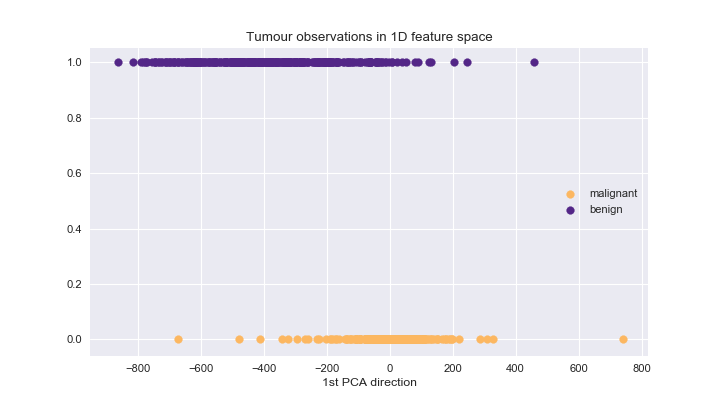

In [131]:
plot_1d(X,y, title = 'Tumour observations in 1D feature space' , class_names = [dataset.target_names[0], dataset.target_names[1]])    

<IPython.core.display.Javascript object>


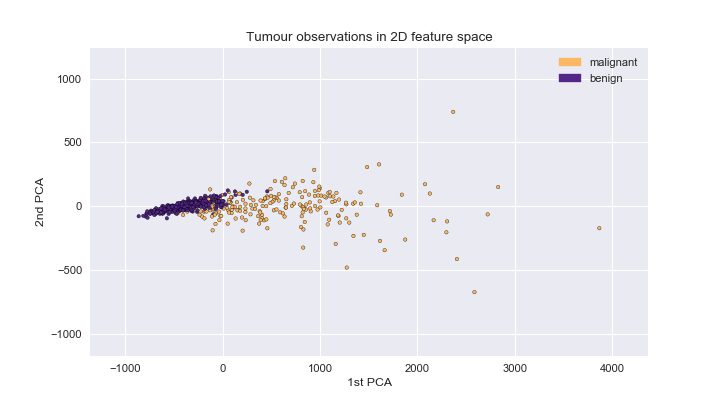

In [130]:
plot_2d(X, y, title = 'Tumour observations in 2D feature space', class_names = [dataset.target_names[0], dataset.target_names[1]]);

We see that in this  reduced feature space, benign tumour observations are lumped more towards negative values in the x-axis representing the first principal component, whereas malignant tumour observations are usually in the positive side of the a-xis. We see also that there are more dispersion in the malignant observations along y-axis.

Next we want to build the logistic regression model which, given an observation with explanatory features, could predict the probability that thetumour is malignant. To this end, we divide the new reduced dataset into two portions: train set is used to fit the model and test set is used to validate the fitted model. It is important to separate the data used in model training and testing as we want to test how well the model can predict teh probability on observations it has not seen before. The ability of a model to do this is called model's <b>ability to generalize</b>.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state, test_size = test_size)

<IPython.core.display.Javascript object>


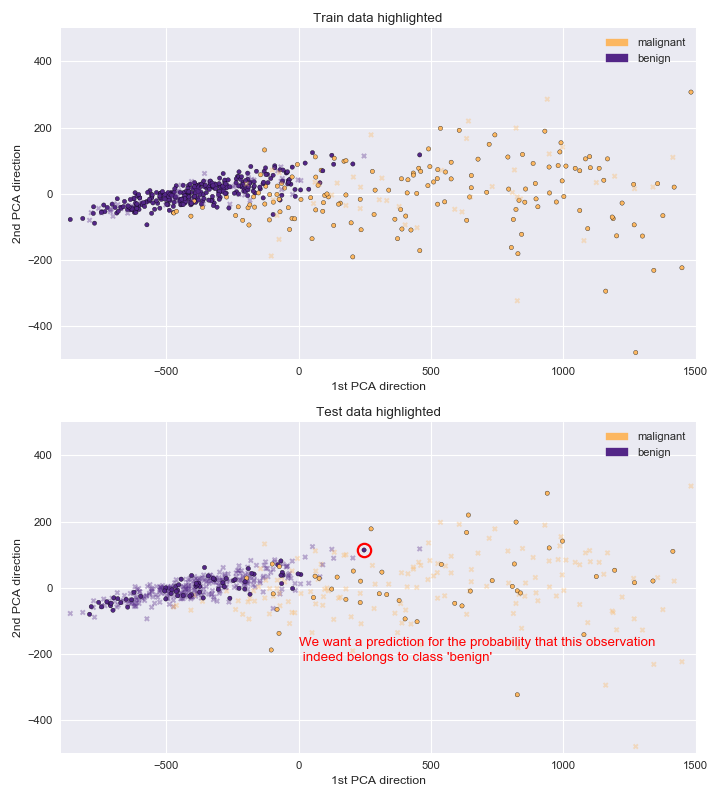

In [139]:
import matplotlib.patches as mpatches
cmap = plt.cm.PuOr
colors = []
colors.append(cmap(0.3)); colors.append(cmap(0.9))
cmap = cmap.from_list('Custom cmap', colors, 2)
class_names = [dataset.target_names[0], dataset.target_names[1]]

# Figure
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (9, 10))

for i in range(2):
    ax = axes[i]
    if i == 0:
        alpha_train = 1.0
        alpha_test = 0.35
        title = 'Train data highlighted'
        marker_train = 'o'; marker_test = 'x' 
    elif i == 1:
        alpha_train = 0.35
        alpha_test = 1.0
        title = 'Test data highlighted' 
        marker_train = 'x'; marker_test = 'o'        
        

    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cmap, edgecolor = 'k', marker = marker_train, s = 15, alpha = alpha_train)
    ax.scatter(X_test[:, 0], X_test[:, 1],   c = y_test,  cmap = cmap, edgecolor = 'k', marker = marker_test, s = 15, alpha = alpha_test)
    ax.set_xlabel('1st PCA direction')
    ax.set_ylabel('2nd PCA direction')
    ax.set_xlim(-900, 1500)
    ax.set_ylim(-500, 500)
    ax.set_title(title)

    if i == 1:
        ax.plot(247, 114, 'o', markersize = 12, fillstyle = 'none', c = 'r', mew = 2)
        ax.text(2, -220,"We want a prediction for the probability that this observation\n indeed belongs to class 'benign'"
                ,fontsize = 12, color = 'r')
    
    # legend
    patch1 = mpatches.Patch(color = cmap(0), label = class_names[0])
    patch2 = mpatches.Patch(color = cmap(1), label = class_names[1])
    patches = [patch1, patch2]
    ax.legend(handles = patches, loc='upper right');

    fig.tight_layout();
    #plt.subplots_adjust(left= None, bottom = None, right = 0.95, top = None, wspace = None, hspace = None)



What we will do next is
 - Fit the model using data highlighted in the upper plot
 - With fitted model, predict the probability of class membership for observations highlighted in lower plot
 - Based on the predicted probabilities, predict whether observations in lower plot would be either malignant or bingn
 - Compare our predictions to reality to see how accurate our model is
 

## Fitting logistic regression model

Recall linear regression equation

\begin{align*}
y = F(\mathbf{x}) = \mathbf{x} '  \mathbf{\beta}
\end{align*}


I logistic regression the plot is drawn from
\begin{align*}
y = \sigma(\mathbf{x}) = \frac{e^{\mathbf{x}'\beta}}{e^{\mathbf{x}'\beta} + 1}  
\end{align*} 

Actual estimation procedure is out of scope for this blog post...

If we use only the 1st PC from our reduced traingin data set as the explanatory variable (including intercept), meaning that $\mathbf{x} '  \mathbf{\beta} = \beta_0 + \beta_1 x$ where $x$ is the 1st PC, we can fit both ordinary linear regression as well as logistic regression and plot the resulting curves $y = F(x)$ and $y = \sigma(x)$.


Optimization terminated successfully.
         Current function value: 0.231548
         Iterations 9


<IPython.core.display.Javascript object>


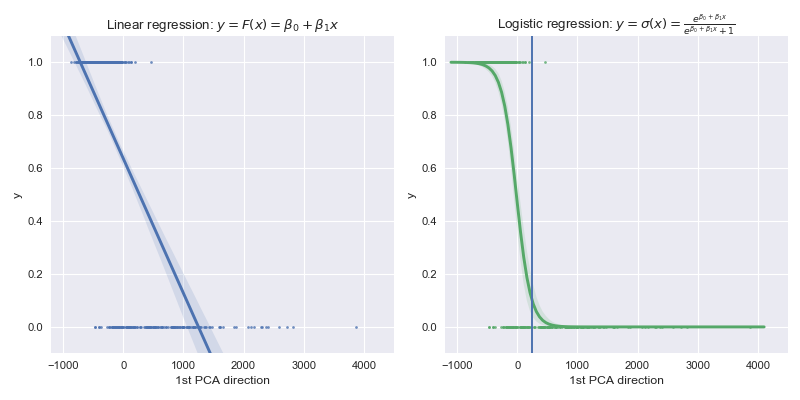

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Scikit learn for accuracy
C = 1e9
model = LogisticRegression(C = C)
model.fit(X_train[:,0].reshape((len(X_train),1)), y_train)
y_pred_1d = model.predict(X_test[:,0].reshape((len(X_test),1)))
y_probs_1d = model.predict_proba(X_test[:,0].reshape((len(X_test),1)))
#print(model.intercept_, model.coef_)


# statsmodel for p-values
import statsmodels.api as sm
endog = y_train
exog = sm.add_constant(X_train[:,0].reshape((len(X_train),1)))
logit = sm.Logit(endog, exog)
logit_res = logit.fit()
logit_res.summary()
#coefficients = result.params

# seaborn for plot
fig, axes = plt.subplots(figsize = (10,5), nrows = 1, ncols = 2)
sns.regplot(x = X_train[:,0], y = y_train, ax = axes[0], scatter_kws={'s':6})
sns.regplot(x = X_train[:,0], y = y_train, logistic = True, ax = axes[1], scatter_kws={'s':6} )

axes[1].axvline(x = 247, color = 'r')

titles = [r'Linear regression: $y = F(x) = \beta_0 + \beta_1 x$'
          , r'Logistic regression: $y = \sigma(x) = \frac{e^{\beta_0 + \beta_1 x}}{e^{\beta_0 + \beta_1 x} + 1}$']
for i in range(2):
    axes[i].set_xlim(-1200, 4500)
    axes[i].set_ylim(-0.1, 1.1)
    axes[i].set_xlabel('1st PCA direction')
    axes[i].set_ylabel('y')    
    axes[i].set_title(titles[i])
plt.tight_layout()

Bar plot of the probs for the selecte dobservation
Probaility can be read off the intersection of vertical and logistic lines

<IPython.core.display.Javascript object>


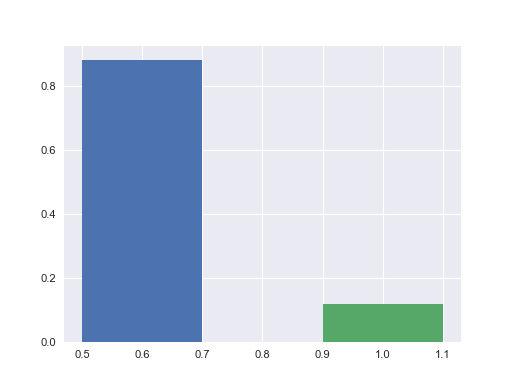

0.0

In [155]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.bar(0.6, y_probs_1d[13][0], width = 0.2)
ax.bar(1, y_probs_1d[13][1], width = 0.2)

X_test[13,:]
y_probs_1d[13]
y_pred_1d[13]

#gg = pd.DataFrame(X_test)

#gg[(gg.iloc[:,0] < 300) & (gg.iloc[:,0] > 100) ]


Let us see this again with two explanatory variables

Optimization terminated successfully.
         Current function value: 0.172227
         Iterations 9


<IPython.core.display.Javascript object>


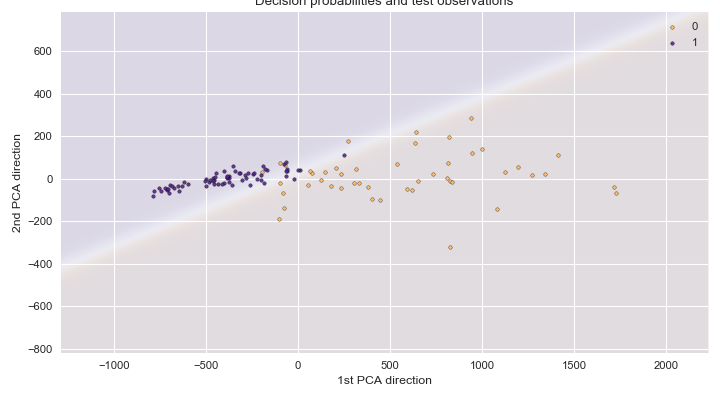

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Scikit learn for accuracy
C = 1e9
model = LogisticRegression(C = C)
model.fit(X_train, y_train)
y_pred_2d = model.predict(X_test)
y_probs_2d = model.predict_proba(X_test)
#print(model.intercept_, model.coef_)


# statsmodel for p-values
import statsmodels.api as sm
endog = y_train
exog = sm.add_constant(X_train)
logit = sm.Logit(endog, exog)
logit_res = logit.fit()
logit_res.summary()
#coefficients = result.params

# plot
plot_bin_decision_probs(X_test, y_test, model, title = 'Decision probabilities and test observations', mesh_step_size = 1, correction = 500)

<IPython.core.display.Javascript object>


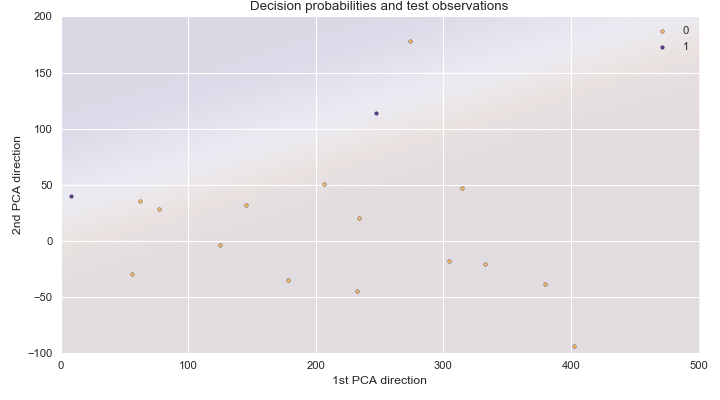

In [150]:
plot_bin_decision_probs(X_test, y_test, model, title = 'Decision probabilities and test observations'
                        ,mesh_step_size = 1, correction = 500, lims= [0, 500, -100, 200])

# add some markers to this, telling what the probs are!!
# The very close case must be prob =  [  4.60903633e-01   5.39096367e-01]

<IPython.core.display.Javascript object>


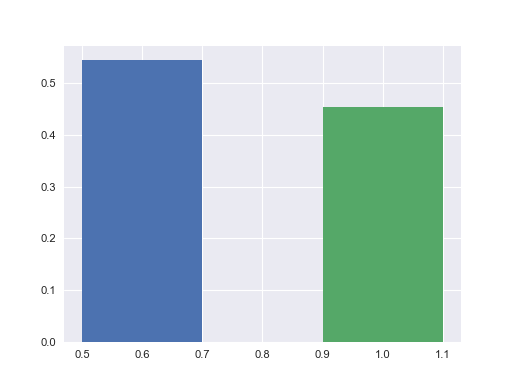

[ 0.54508624  0.45491376]
0.0


array([ 247.07096244,  114.29591563])

In [157]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.bar(0.6, y_probs_2d[13][0], width = 0.2)
ax.bar(1, y_probs_2d[13][1], width = 0.2)


print(y_probs_2d[13])
print(y_pred_2d[13])
X_test[13,:]

Combined with a decision rule, we can use logistic regression as a classifier:

<IPython.core.display.Javascript object>


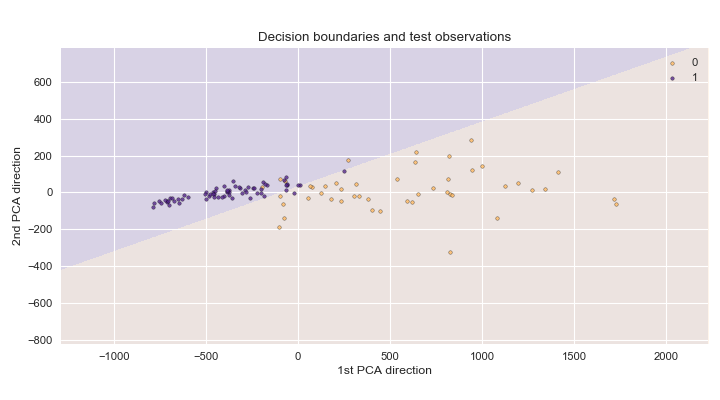

In [129]:
plot_decision_boundaries(X_test, y_test, model, title = 'Decision boundaries and test observations', mesh_step_size = 1, correction = 500)



<IPython.core.display.Javascript object>


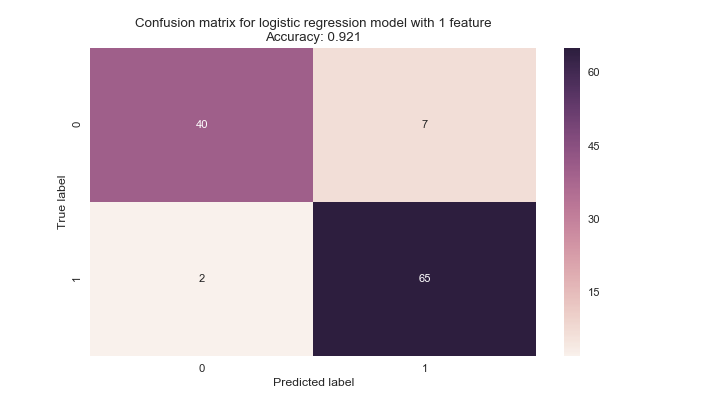

In [122]:
plot_confusion_matrix(y_test, y_pred_1d, title = 'Confusion matrix for logistic regression model with 1 feature')

<IPython.core.display.Javascript object>


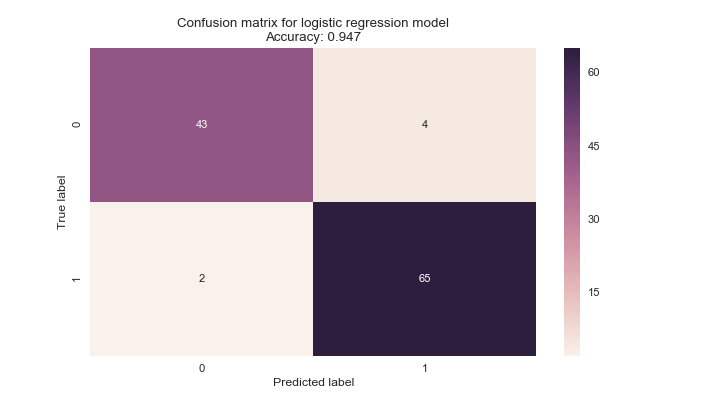

In [123]:
plot_confusion_matrix(y_test, y_pred_2d, title = 'Confusion matrix for logistic regression model')

# Math of logistic regression

Logistic function $\sigma(z)$ is a special case of sigmoind function family. It is given by

\begin{align*}
p = \sigma(z) &= \frac{e^{z}}{1+e^{z}}
\end{align*}

Inverse of logistic function is the logit function

\begin{align*}
logit(p) \equiv \sigma^{-1}(p) = ln \big( \frac{p}{1-p} \big)
\end{align*}

$\frac{p}{1-p}$ is called odds, logit is the logarithm of the odds. 


Substituting for p we have

\begin{align*}
logit(z) &= ln \big( \frac{\sigma(z)}{1-\sigma(z)} \big) = ln \Big( \frac{\frac{1}{1 + e^{-z}}}{1- \frac{1}{1+e^{-z}}} \Big) \\[4pt]
         &= ln \Big( \frac{\frac{1}{1 + e^{-z}}}{\frac{e^{-z}}{1+e^{-z}}} \Big) = ln \Big( \frac{1}{1+e^{-z}} \ \frac{1+e^{-z}}{e^{-z}} \Big) \\[4pt]
         &= ln \Big( \frac{1}{e^{-z}} \Big) = -ln ( e^{-z} ) \\[4pt]
         &= z
\end{align*}